Download http://download.tensorflow.org/example_images/flower_photos.tgz

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from PIL import Image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Cargar imagenes

In [11]:
path = '/home/kopita/Desktop/flower_photos/'
img_size = 224
batch_size = 16

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(path, shuffle=False,
    target_size=(img_size, img_size), batch_size=batch_size)

Found 3670 images belonging to 5 classes.


In [13]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

dandelion/19617501581_606be5f716_n.jpg


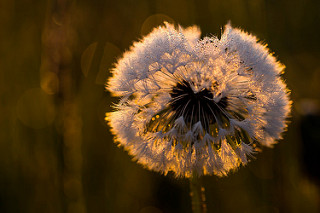

In [14]:
random_img = np.random.choice(train_generator.filenames)
print(random_img)
Image.open(path + random_img)

In [15]:
batch_x, batch_y = train_generator.next()
batch_x.shape, batch_y.shape

((16, 224, 224, 3), (16, 5))

# Cargar la red entrenada

In [8]:
model = ResNet50(include_top=False)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [9]:
model.input, model.output

(<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>,
 <tf.Tensor 'avg_pool/AvgPool:0' shape=(?, ?, ?, 2048) dtype=float32>)

In [27]:
t0 = time()
output = model.predict_on_batch(batch_x)
elapsed = time() - t0
output.shape, elapsed

((16, 1, 1, 2048), 4.6572349071502686)

In [31]:
print('%.2f minutos por epoch.' % ((train_generator.samples // batch_size) * elapsed / 60))

17.78 minutos por epoch.


# Preprocesar las imagenes con la red entrenada

In [101]:
n_batch = train_generator.samples // batch_size
n_batch

229

In [105]:
train_generator.reset()
outputs_x = []
outputs_y = []

for i in range(3):
    print('%d/%d...' % (i+1, n_batch), end='\r')
    batch_x, batch_y = train_generator.next()
    outputs_x.append(model.predict_on_batch(batch_x))
    outputs_y.append(batch_y)

In [113]:
outputs_x = np.vstack(outputs_x)
outputs_y = np.vstack(outputs_y)
outputs_x.shape, outputs_y.shape

((48, 1, 1, 2048), (48, 5))